# **Time Series Analysis: Types of Analysis**

## **Table of Contents**

1. [Introduction to Time Series Analysis](#introduction-to-time-series-analysis)
2. [Types of Time Series Analysis](#types-of-time-series-analysis)
    - 2.1 [Descriptive Analysis - Exploratory Data Analysis (EDA)](#descriptive-analysis---exploratory-data-analysis-eda)
    - 2.2 [Time Series Forecasting (Numeric Data Type)](#time-series-forecasting-numeric-data-type)
    - 2.3 [Time Series Classification & Regression (Categorical Data Type)](#time-series-classification--regression-categorical-data-type)
    - 2.4 [Time Series Decomposition](#time-series-decomposition)
    - 2.5 [Spectral Analysis](#spectral-analysis)
3. [Conclusion](#conclusion)

---


# **Introduction to Time Series Analysis**

Time series analysis involves analyzing data that is collected at different points in time. It is useful for understanding trends, forecasting, and detecting patterns in datasets that have a time component.

---

# **Types of Time Series Analysis**

### **1. Descriptive Analysis - Exploratory Data Analysis (EDA)**

Descriptive analysis helps us understand the key characteristics of time series data by summarizing it. Exploratory Data Analysis (EDA) is the process of examining the data to uncover trends, patterns, and anomalies.

#### **Key Concepts:**
1. **Time-based Indexing:**   

- Time series data is organized and indexed by time (e.g., daily, hourly, or monthly).
- Each data point is tied to a specific time, making it easy to track changes over time.   

2. **Time Stamps:**
- Data is collected with precise time stamps (e.g., '2023-10-08 12:30:45').
- Time stamps help ensure accuracy and allow us to analyze how values change at specific moments.   

3. **Interchangeable Data:**   
- Time series data can be plotted with time on the x-axis and values on the y-axis, making it easy to visualize trends and patterns.
- For example, you can graph daily sales numbers over time to spot increases or decreases.   

4. **Metadata:**   
- Metadata refers to extra information about the data, such as how it was collected, where it came from, or other related information.
- Knowing the metadata helps us better understand the quality and origin of the data.   

#### **Example Code for EDA:**

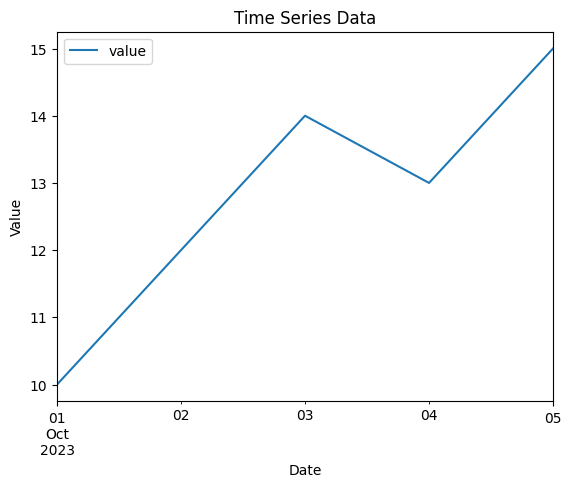

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample time series data with time-based indexing
data = {'date': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04', '2023-10-05'],
        'value': [10, 12, 14, 13, 15]}
df = pd.DataFrame(data)

# Convert the 'date' column to datetime type and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot the data
df.plot()
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

---
### **2. Time Series Forecasting (Numeric Data Type)**

Time series forecasting is all about predicting future values of a time series based on historical data. For example, forecasting future stock prices, weather conditions, or sales based on past trends.

#### **Key Points:**   

**Exploratory Data Analysis (EDA) Improves Forecast Accuracy:**

- A thorough EDA helps to understand the structure of the data, trends, and seasonality. This can significantly improve the performance of forecasting models.   

**ARIMA (Autoregressive Integrated Moving Average):**

- ARIMA is a widely used model for time series forecasting that works well when there is no seasonal pattern in the data.   

*It combines:*   

- *Autoregression (AR):* Uses past values to predict future ones.
- *Integrated (I):* Differencing the data to make it stationary (constant mean and variance over time).
- *Moving Average (MA):* Uses past forecast errors to predict future values.
- *Example of ARIMA Use:* Predicting future stock prices based on past data, without a repeating seasonal pattern.   

**SARIMA (Seasonal ARIMA):**

- SARIMA extends ARIMA by adding a seasonal component, making it useful for data with regular, repeating patterns (like monthly sales data or daily temperature readings).
- It adjusts for both seasonal patterns and trends within the data

#### **Example Code for ARIMA:**

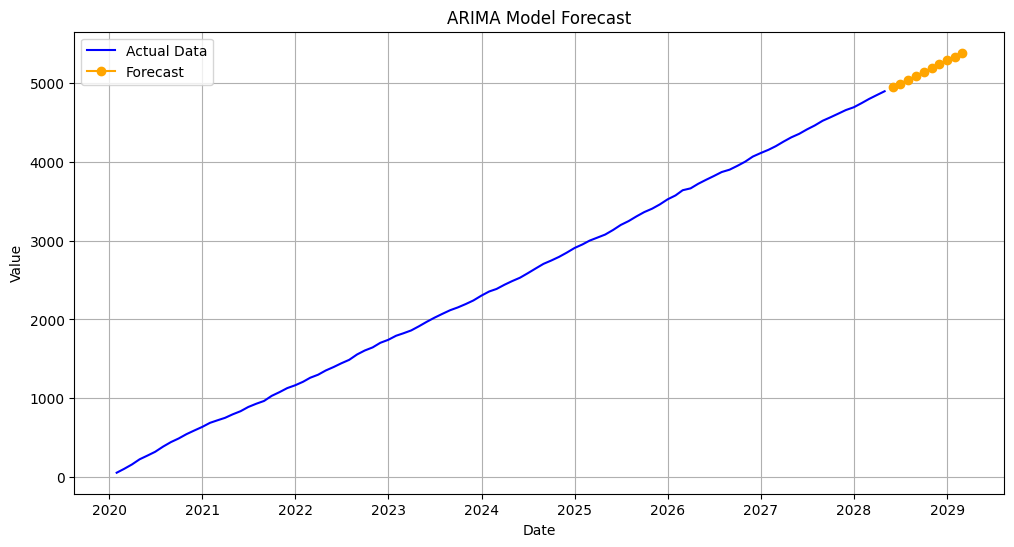

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate sample time series data (e.g., monthly data)
np.random.seed(42)
n = 100  # number of data points
time = pd.date_range(start='2020-01-01', periods=n, freq='ME')
data = np.random.normal(loc=50, scale=10, size=n).cumsum()  # Cumulative sum to create a trend
ts_data = pd.Series(data, index=time)

# Fit the ARIMA model
model = ARIMA(ts_data, order=(1, 1, 1))  # (p, d, q) parameters
model_fit = model.fit()

# Forecast the next 10 values
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the actual data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Actual Data', color='blue')
plt.plot(pd.date_range(start=ts_data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME'), forecast, label='Forecast', color='orange', marker='o')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


---
### **3. Time Series Classification & Regression (Categorical Data Type)**

Time series classification and regression techniques help predict outcomes based on time-dependent data. While regression deals with predicting continuous values (e.g., stock prices, temperature), classification deals with predicting categories or labels (e.g., identifying if a time series pattern indicates a specific event like equipment failure or a spike in demand). These techniques rely on machine learning models that are adapted to handle time-based features effectively.

#### **Classification vs. Regression:**
*Time Series Classification:*    
- Focuses on assigning a time series (or a point within it) to one of several predefined categories.    
- For example, determining if a patient’s heart rate data indicates a healthy or unhealthy condition.

*Time Series Regression:*    
- Focuses on predicting continuous outcomes.   
- For example, forecasting the future sales of a product based on historical sales data.

Both classification and regression benefit from the inclusion of time-dependent features such as trends, seasonality, or cyclical patterns.

#### **Popular Algorithms:**
- Random Forest
- XGBoost
- Support Vector Machine (SVM)
- Neural SVMs
- Artificial Neural Networks (ANN) & many more.

#### **Example Code (Random Forest for Time Series):**

C:\Users\zahra\AppData\Local\Temp\ipykernel_6436\740687187.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test['Time'], X_test['Value'], c=predictions, marker='x', s=100, label='Predicted Labels', edgecolor='black')


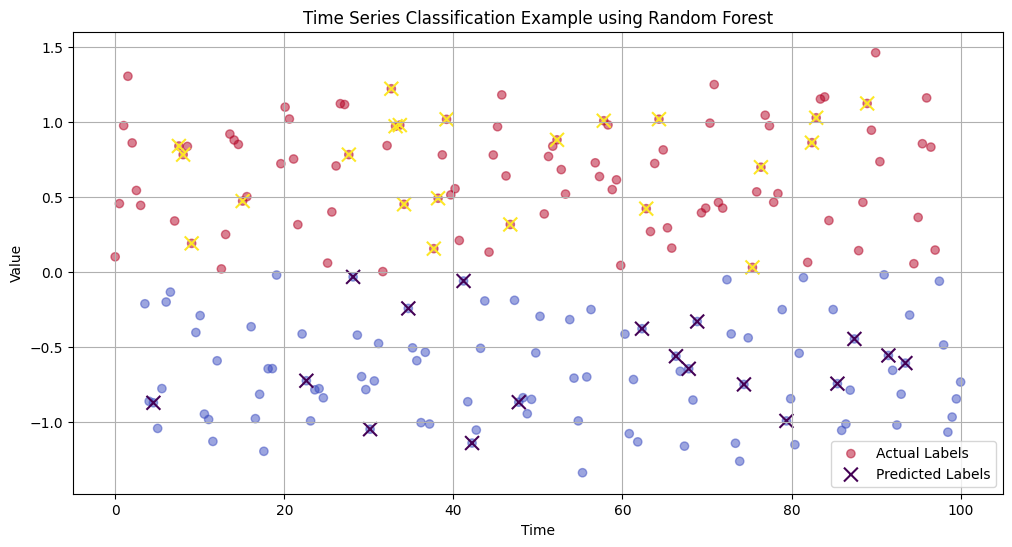

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate sample time series data
np.random.seed(42)
time = np.linspace(0, 100, 200)
# Create a binary classification based on a simple threshold
data = np.sin(time) + np.random.normal(0, 0.2, time.shape)  # Sine wave with noise
labels = (data > 0).astype(int)  # Classify as 1 if above zero, else 0

# Create a DataFrame
df = pd.DataFrame({'Time': time, 'Value': data, 'Label': labels})

# Split the data into features and labels
X = df[['Time', 'Value']]
y = df['Label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
predictions = clf.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(df['Time'], df['Value'], c=df['Label'], cmap='coolwarm', alpha=0.5, label='Actual Labels')
plt.scatter(X_test['Time'], X_test['Value'], c=predictions, marker='x', s=100, label='Predicted Labels', edgecolor='black')
plt.title('Time Series Classification Example using Random Forest')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

---
### **4. Time Series Decomposition**

Time series decomposition is a method used to break down a time series into simpler, more interpretable parts. It helps us better understand the patterns and behaviors within the data over time. Decomposition is especially useful for identifying long-term trends, recurring seasonal patterns, and any irregularities or noise.

#### **Components of Decomposition:**
**Trend:**

- The trend represents the overall, long-term direction of the time series.
- It shows whether the data is moving upwards (increasing) or downwards (decreasing) over time.
- **Example:** The steady growth of a company’s sales over multiple years.   

**Seasonality:**

- Seasonality refers to repeating, short-term patterns that occur at regular intervals (e.g., daily, weekly, monthly, or yearly).
- It helps detect repeating cycles such as higher sales during the holiday season or more traffic on weekends.
**Example:** Increased air conditioner sales during summer months each year.   

**Residual (or Noise):**

- The residual is the leftover part of the data after removing the trend and seasonality. It represents random variations, errors, or noise in the data.
- It’s the unpredictable component that can’t be easily explained by trends or seasonality.
**Example:** Unexpected sales fluctuations due to an unforeseen event (like a natural disaster).

#### **How Decomposition Works:**
Decomposition breaks a time series into:

- **Additive:** When the components are summed together (e.g., data = trend + seasonality + residual).
- **Multiplicative:** When the components are multiplied (e.g., data = trend * seasonality * residual). This is used when variations increase with the level of the data (e.g., larger sales in holiday seasons with a growing trend).

#### **Example Code for Time Series Decomposition:**

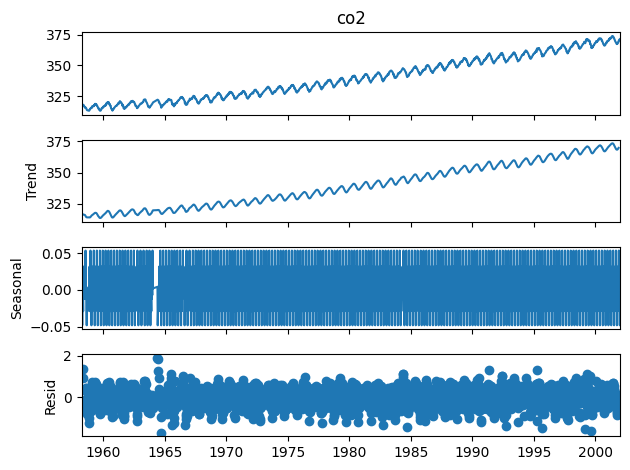

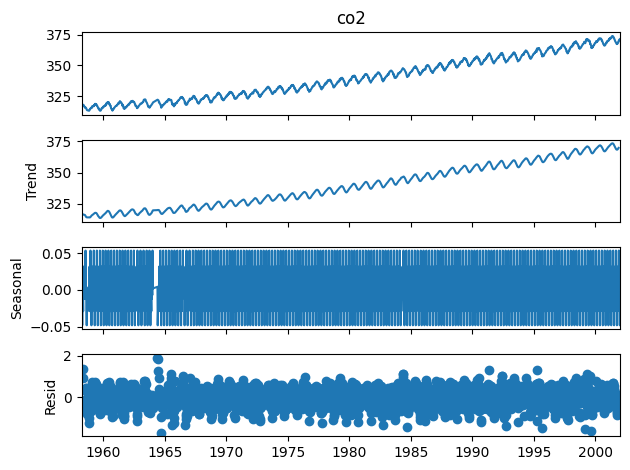

In [34]:
import statsmodels.api as sm

# Sample time series data (CO2 levels)
data = sm.datasets.co2.load_pandas().data['co2'].dropna()

# Perform additive decomposition
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=12)

# Plot the decomposition
decomposition.plot()

---
### **5. Spectral Analysis**

Spectral analysis is a method used to study and identify cyclical patterns or repeating variations in time series data by looking at the frequency domain. Instead of analyzing the data directly over time, it focuses on the different frequencies (or cycles) present in the data. 
Spectral analysis helps uncover repeating patterns in time series data that might be hard to spot in the time domain. By converting the data into the frequency domain, it becomes easier to detect cycles and periodic behaviors that occur over time.     

#### **Key Concepts:**   
**Time Domain vs. Frequency Domain:**   

- In the time domain, we analyze the data based on how it changes over time (e.g., daily temperatures).
- In the frequency domain, we focus on identifying how often certain patterns repeat (e.g., identifying a yearly cycle in temperature data).   

**Frequency:**   

- The frequency of a cycle is how often it repeats over a specific period of time. 
- *For example*, if something repeats every 12 months, its frequency is once per year.   

**Cyclical Patterns:**   

- Spectral analysis helps detect these recurring cycles, which are often hard to see just by looking at time series data. 
- *For instance*, it can uncover cycles like seasonal sales spikes or market fluctuations.   

#### **Example Code for Spectral Analysis:**

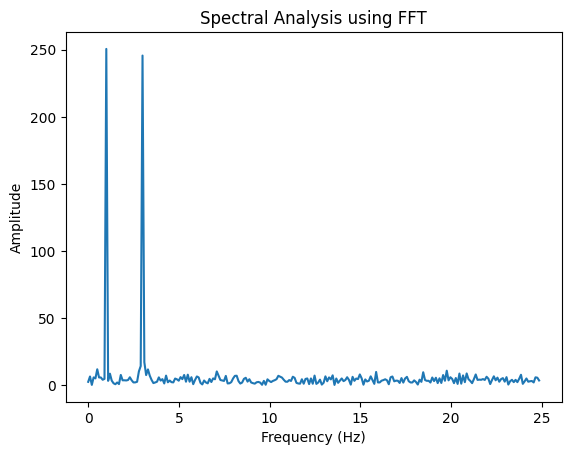

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample time series data (with two different frequencies)
np.random.seed(0)
time = np.linspace(0, 10, 500)
# Signal with two frequencies: 1 Hz and 3 Hz
data = np.sin(2 * np.pi * 1 * time) + np.sin(2 * np.pi * 3 * time) + np.random.normal(0, 0.2, time.shape)

# Perform Fast Fourier Transform (FFT)
fft_result = np.fft.fft(data)
frequencies = np.fft.fftfreq(len(data), time[1] - time[0])

# Only keep positive frequencies
positive_frequencies = frequencies[frequencies >= 0]
positive_fft_result = np.abs(fft_result[frequencies >= 0])

# Plot the frequency spectrum
plt.plot(positive_frequencies, positive_fft_result)
plt.title('Spectral Analysis using FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

---
### **Conclusion**   

Time series analysis is a versatile and powerful tool for understanding and predicting data that changes over time. Each type of analysis serves a specific purpose in extracting meaningful insights from time series data:

1. **Descriptive Analysis (EDA)** provides the foundation by summarizing and visualizing key characteristics of the data, such as trends and anomalies, using time-based indexing, time stamps, and metadata. A good EDA leads to better understanding and more accurate predictions.

2. **Time Series Forecasting** focuses on predicting future values. Techniques like **ARIMA** and **SARIMA** enable accurate forecasting by accounting for trends and seasonality in numeric data. Proper EDA enhances the accuracy of these models.

3. **Time Series Classification and Regression** apply machine learning algorithms such as **Random Forest**, **XGBoost**, and **Neural Networks** to predict categorical outcomes or continuous values based on past patterns. These methods help in applications like event prediction or categorizing time-dependent behaviors.

4. **Time Series Decomposition** breaks down data into its core components—**trend**, **seasonality**, and **residuals**—helping to understand the long-term direction and recurring patterns in the data.

5. **Spectral Analysis** explores the frequency domain of time series data, revealing cyclic patterns that might not be obvious from time-based observation alone. This is particularly useful for uncovering hidden repeating cycles.

In conclusion, time series analysis techniques enable a deeper understanding of data behavior over time, whether you're summarizing past patterns, predicting future values, or identifying hidden cycles. Together, these methods provide a comprehensive toolkit for making informed decisions and building accurate predictive models.

---

### Information About The Creator

---

**Zahra Haider**

[Kaggle](https://www.kaggle.com/zahrahaider101)   
[Github](https://github.com/zahrahaider13)  
[X-Twitter](https://x.com/zahrahaider101)               
[Instagram](https://www.instagram.com/zahrahaider101/)
